In [ ]:
import pandas as pd
import numpy as np

from catboost import CatBoostClassifier

from joblib import dump, load

import matplotlib.pyplot as plt


In [ ]:
# read train data
A = pd.read_csv("WORK_bank_data_train.csv", sep=';')

# save mean of age and lifetime
age = A["Age"].mean()
lifetime = A["Lifetime"].mean()

# change None in age and lifetime for mean
A.fillna(value = {"Age": age, "Lifetime" : lifetime}, inplace=True)

# drop unuseful columns
A.drop(columns=['ID', 'District'], inplace=True)

# change target to -/+1
A.loc[A["Target1"] == "No", "Target1"] = -1
A.loc[A.Target2 == "No", "Target2"] = -1
A.loc[A.Target1 == "Yes", "Target1"] = 1
A.loc[A.Target2 == "Yes", "Target2"] = 1
A["Target1"] = A["Target1"].astype('int')
A["Target2"] = A["Target2"].astype('int')

# break data on target and features
y1 = A.Target1
y2 = A.Target2
df = A.drop(['Target1', 'Target2'], axis=1)

# one-hot
df = pd.get_dummies(df)

# delete unuseful columns  after on-hot 
df = df.drop(['Region_Unknown', 'Gender_U'], axis=1)




In [ ]:
# CatBoost
catb_1 = CatBoostClassifier()
catboost_t1 = catb_1.fit(df, y1)

dump(catboost_t1, open("model_t1.sav", 'wb'))




Learning rate set to 0.195533
0:	learn: 0.4952107	total: 380ms	remaining: 6m 20s
1:	learn: 0.3974909	total: 703ms	remaining: 5m 50s
2:	learn: 0.3458806	total: 1.05s	remaining: 5m 49s
3:	learn: 0.3130189	total: 1.36s	remaining: 5m 37s
4:	learn: 0.2974273	total: 1.65s	remaining: 5m 28s
5:	learn: 0.2816106	total: 1.96s	remaining: 5m 25s
6:	learn: 0.2743948	total: 2.26s	remaining: 5m 20s
7:	learn: 0.2697170	total: 2.55s	remaining: 5m 16s
8:	learn: 0.2667331	total: 2.85s	remaining: 5m 14s
9:	learn: 0.2643674	total: 3.15s	remaining: 5m 11s
10:	learn: 0.2629089	total: 3.46s	remaining: 5m 11s
11:	learn: 0.2612093	total: 3.77s	remaining: 5m 10s
12:	learn: 0.2599484	total: 4.06s	remaining: 5m 8s
13:	learn: 0.2567402	total: 4.38s	remaining: 5m 8s
14:	learn: 0.2560066	total: 4.7s	remaining: 5m 8s
15:	learn: 0.2553619	total: 5.02s	remaining: 5m 8s
16:	learn: 0.2547854	total: 5.31s	remaining: 5m 6s
17:	learn: 0.2540993	total: 5.63s	remaining: 5m 7s
18:	learn: 0.2532648	total: 5.92s	remaining: 5m 5s


In [ ]:
catb_2 = CatBoostClassifier()
catboost_t2 = catb_2.fit(df, y2)

dump(catboost_t2, open("model_t2.sav", 'wb'))


Learning rate set to 0.195533
0:	learn: 0.4461485	total: 345ms	remaining: 5m 44s
1:	learn: 0.3176960	total: 684ms	remaining: 5m 41s
2:	learn: 0.2450901	total: 1s	remaining: 5m 32s
3:	learn: 0.2040520	total: 1.32s	remaining: 5m 28s
4:	learn: 0.1769815	total: 1.62s	remaining: 5m 23s
5:	learn: 0.1541712	total: 1.96s	remaining: 5m 24s
6:	learn: 0.1437666	total: 2.27s	remaining: 5m 22s
7:	learn: 0.1338732	total: 2.58s	remaining: 5m 19s
8:	learn: 0.1278611	total: 2.9s	remaining: 5m 19s
9:	learn: 0.1233104	total: 3.21s	remaining: 5m 18s
10:	learn: 0.1185105	total: 3.55s	remaining: 5m 19s
11:	learn: 0.1161684	total: 3.86s	remaining: 5m 17s
12:	learn: 0.1150161	total: 4.17s	remaining: 5m 16s
13:	learn: 0.1142953	total: 4.46s	remaining: 5m 14s
14:	learn: 0.1122350	total: 4.79s	remaining: 5m 14s
15:	learn: 0.1099353	total: 5.09s	remaining: 5m 13s
16:	learn: 0.1082007	total: 5.39s	remaining: 5m 11s
17:	learn: 0.1074477	total: 5.67s	remaining: 5m 9s
18:	learn: 0.1067379	total: 5.98s	remaining: 5m 8

In [ ]:
####### for test data

In [ ]:
# read train data
T = pd.read_csv("WORK_WORK_BANK_DATA_test_sample.csv", sep=';')

# save mean of age and lifetime
age = T["Age"].mean()
lifetime = T["Lifetime"].mean()

T.rename(columns = {"Ind_House_hold": 'Ind_Household'}, inplace=True)
# change None in age and lifetime for mean
T.fillna(value = {"Age": age, "Lifetime" : lifetime}, inplace=True)

# drop unuseful columns
col_id = T['ID']
T.drop(columns=['ID', 'District'], inplace=True)


# one-hot
T = pd.get_dummies(T)

# delete unuseful columns  after on-hot 
T = T.drop(['Region_Unknown', 'Gender_U'], axis=1)

T['Ind_email_No'] = 0
T['Ind_email_Yes'] = 0
T['Ind_phone_No'] = 0
T['Ind_phone_Yes'] = 0




In [ ]:
model_t1 = load(open("model_t1.sav", 'rb'))
model_t2 = load(open("model_t2.sav", 'rb'))

In [ ]:
def count_E(A, total, cost_e, cost_s, per_e, per_s, bins = 50):
  email = A.sort_values(by="email", ascending=False, ignore_index=True)
  sms = A.sort_values(by="sms", ascending=False, ignore_index=True)
  A["ind"] = 0

  total = min(total,  (cost_e * per_e/100 + cost_s*per_s/100)* (A.shape[0] - 20))
  i_s = 0
  k_s = 0
  i_e = 0
  k_e = 0

  count = 0
  x = []
  y = []
  for b in range(bins):
    total_b = total/bins * (b + 1)
    x.append(total_b)
    s = int(total_b/cost_s * per_s/100)
    e = int(total_b/cost_e * per_e/100)
    while i_e != e + k_e:
      current_index = email.at[i_e, "id"]
      if a.at[i_e, "ind"] == 0:
        count += email.at[i_e, "email"]
        a.at[i_e, "ind"] = 1
      else: 
        k_e += 1
      i_e += 1

    while i_s != s + k_s:
      current_index = sms.at[i_s, "id"]
      if a.at[i_s, "ind"] == 0:
        count += sms.at[i_s, "sms"]
        a.at[i_s, "ind"] = 2
      else:
        k_s += 1
      i_s += 1
    y.append(count)
  return x, y



In [ ]:
a = pd.DataFrame()
a["email"] = pd.DataFrame(model_t1.predict_proba(T))[1]
a["sms"] = pd.DataFrame(model_t2.predict_proba(T))[1]
a["id"] = col_id
a

,email,sms,id
0,0.033917,0.000084,1200000027
1,0.190147,0.000243,1200000040
2,0.198339,0.000631,1200000041
3,0.052182,0.000130,1200000071
4,0.487544,0.001401,1200000080
...,...,...,...
63093,0.144605,0.000148,1201048525
63094,0.007795,0.000076,1201048529
63095,0.001040,0.000013,1201048544
63096,0.609734,0.000403,1201048557


In [ ]:
x, y = count_E(A=a, total=40000, cost_e=2, cost_s=4, per_e=80, per_s=20, bins = 50)

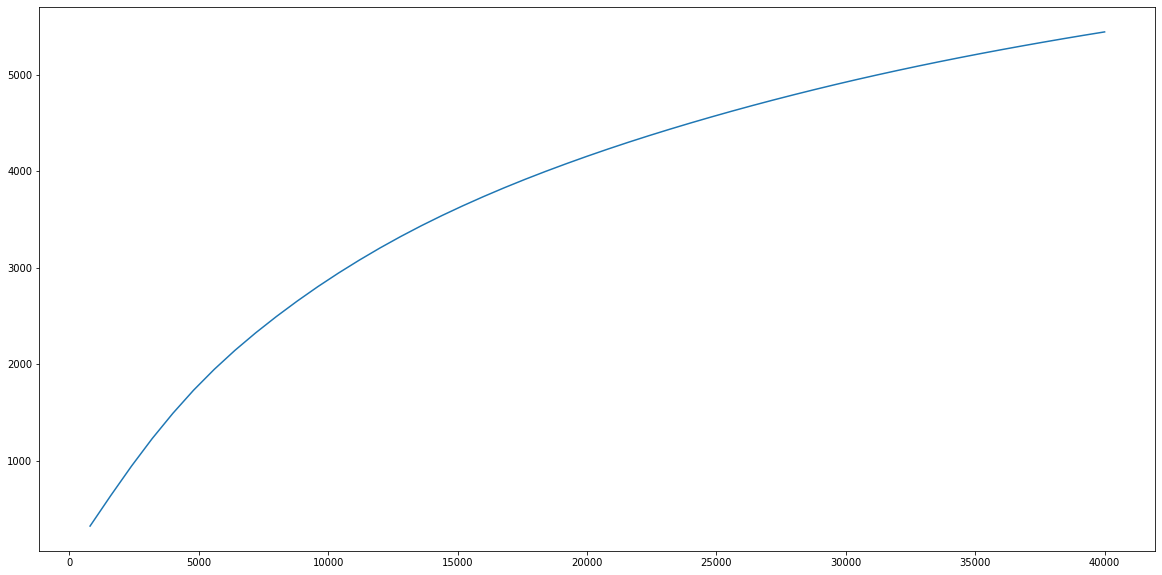

In [ ]:
fig = plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.show()

In [ ]:
email_list = a[a["ind"] == 1]["id"].to_list()
sms_list = a[a["ind"] == 2]["id"].to_list()
